In [1]:
from cobaya.yaml import yaml_load_file
from cobaya.model import get_model
import matplotlib.pyplot as plt
import numpy as np

In [29]:
from classy import Class

CDMcosmo = Class()
h=0.67
common = {
    'h': h,
    'omega_b': 0.022,
    'omega_cdm': 0.12,
    'A_s': 2.149e-09,
    'n_s': 0.96,
    'tau_reio': 0.0925,
    'N_ncdm': 0.0,
    'N_ur': 3.046,
    # 'non_linear': 'none',
    'background_verbose': 0,
    'output': 'mPk tCl pCl',
    'z_pk': '1000 0.38 0',
    'P_k_max_1/Mpc': 5,
    # 'gauge': 'newtonian',
    'l_max_scalars': 2500,
    }
CDMcosmo.set(common)
CDMcosmo.compute()

fxcosmo = Class()
fxcosmo.set(common)
m_ev = 1.e-24
omega_ax = 0.1
_H0_ = 3.336e-4 * h
_ev_to_HO_ = 1.56e29 / _H0_
new={
    'omega_cdm': 0.12 - omega_ax,
    'scf_potential': 'axion',
    'n_axion': 1,
    'f_axion': 0.4,  # in units of mpl
    'Omega_scf' : omega_ax/h/h,
    'm_axion': m_ev * _ev_to_HO_,  # in units of H0
    'tol_shooting_deltax': 1e-4,
    'tol_shooting_deltaF': 1e-4,
    'scf_parameters': '0.05,0.0',  # note: if Omega_scf is set, the parameter entry corresponding to scf_tuning_index is ignored and used for shooting.
    'scf_tuning_index': 0,  # in this example, we shoot over theta_ini in order to adjust Omega_scf.
    'scf_evolve_as_fluid': 'yes',  # if set to yes, will switch for fluid when threshold_scf_fluid_m_over_H is met
    'scf_evolve_like_axionCAMB': 'yes',  # fluid all the time in perts, the option no is currently bugging, to be debugged
    'threshold_scf_fluid_m_over_H': 3,  # threshold_scf_fluid_m_over_H controls when to switch to fluid
    'do_shooting': 'yes',  # controls shooting in general; e.g. theta_s
    'do_shooting_scf': 'yes',  # necessary when log10_axion_ac & log10_fraction_axion_ac are chosen
    'scf_has_perturbations': 'yes',  # for pedagogical purposes only
    'use_big_theta_scf': 'no',  # in perts with the fluid it is often more stable to follow the heat flux rather "Big Theta=(1+w)*Theta" than the velocity divergence "Theta"
    'use_delta_scf_over_1plusw': 'no',
    'attractor_ic_scf': 'no',  # some specific IC for tracker potentials
    'evolver': 0
}
fxcosmo.set(new)
fxcosmo.compute()

Pkatk_cdm, kk_cdm , zz = CDMcosmo.get_pk_and_k_and_z(nonlinear=False, h_units=True, only_clustering_species=False)
Pkatk_fx, kk_fx , zz = fxcosmo.get_pk_and_k_and_z(nonlinear=False, h_units=True, only_clustering_species=True)

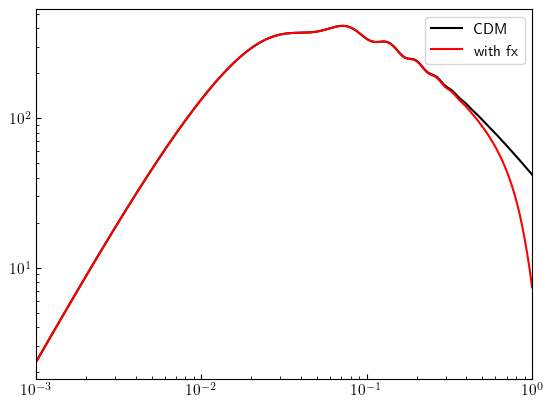

In [30]:
%matplotlib inline

zeval = 0.5
kk = np.logspace(-3.,0.,200); h = CDMcosmo.h(); Pk_list=[]
for k in kk:
    Pk_list.append([CDMcosmo.pk_lin(k*h,zeval)*h**3,fxcosmo.pk_lin(k*h,zeval)*h**3]) # function .pk(k,z)
Pk_list=np.array(Pk_list)


plt.plot(kk,kk*Pk_list[:,0], 'k', label='CDM')
plt.plot(kk,kk*Pk_list[:,1],'r', label='with fx')

# plt.loglog(kk_cdm,Pkatk_cdm[:,-1]*h**3, 'k', label='CDM')
# plt.loglog(kk_fx,Pkatk_fx[:,-1]*h**3,'r', label='with fx')
# plt.loglog(kk_nu,Pkatk_nu[:,-1]*h**3,'g', label='nu')


plt.xscale('log')
plt.yscale('log')

plt.xlim([1.e-3,1])
# plt.ylim([1.e2,None])
plt.legend()
plt.show()

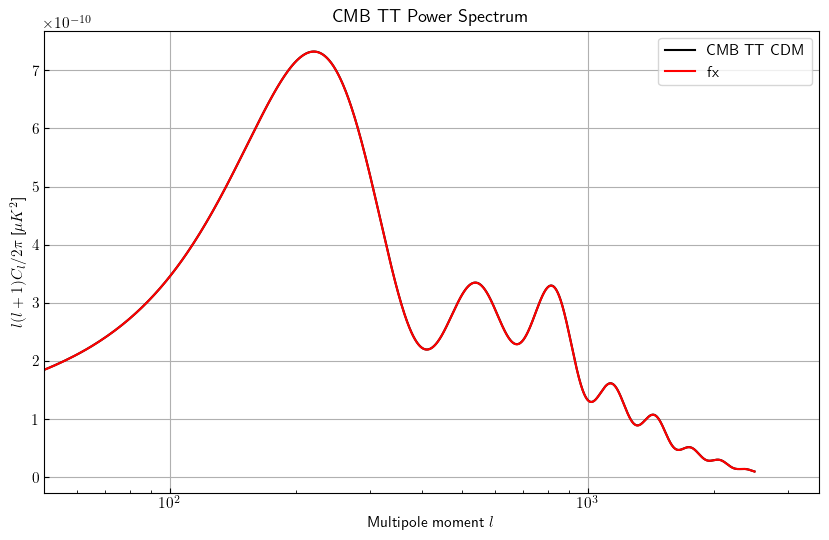

In [19]:
# Extract the CMB power spectrum
cls = CDMcosmo.raw_cl()
l = cls['ell'][2:]
Cl_TT = cls['tt'][2:]


# Plot the CMB power spectrum
plt.figure(figsize=(10, 6))
plt.semilogx(l, l * (l + 1) * Cl_TT / (2 * np.pi), 'k', label='CMB TT CDM')
plt.semilogx(l, l * (l + 1) * fxcosmo.raw_cl()['tt'][2:] / (2 * np.pi), 'r', label='fx')

plt.xlabel(r'Multipole moment $l$')
plt.ylabel(r'$l(l+1)C_l / 2\pi$ [$\mu K^2$]')
plt.title('CMB TT Power Spectrum')
plt.legend()
plt.grid(True)
plt.xlim([50,None])
plt.show()

----
check cobaya

In [20]:
info_from_yaml = yaml_load_file("/home/fverdian/cobaya/FRA-params/AxiCLASS.yaml")
info_from_yaml['likelihood']['pbjboss']['likelihood']['store_theorydict']=True
info_from_yaml['likelihood']['pbjboss']['python_path']='/home/fverdian/cobaya/pbj4cobaya/'
info_from_yaml['likelihood']['pbjboss']['pbj_path']='/home/fverdian/cobaya/pbj-multiz/'
model_pbj = get_model(info_from_yaml)

[model] *WARNING* Ignored blocks/options: ['sampler', 'output']
[classy] `classy` module loaded successfully from /home/fverdian/anaconda3/lib/python3.10/site-packages


[info] The linear power spectrum will be computed with cobaya
Loading linear emulator...
[absl] Fingerprint not found. Saved model loading will continue.


/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[absl] Fingerprint not found. Saved model loading will continue.
Linear emulator loaded in memory.
[info] Infrared resummation: True, kind: EH
[info] Alcock-Paczynski distortions: True


/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[pbjboss] Observables: ['P0', 'P2']
[pbjboss] Using model_varied_cosmology_analytic_marg_multiz as likelihood model function
Setting fx functions
[pbjboss] Analyzing boss at redshifts [0.38 0.38 0.61 0.61]
[pbjboss] Analytically marginalizing on ['bG3', 'c0', 'c2', 'aP', 'e0k2', 'e2k2']


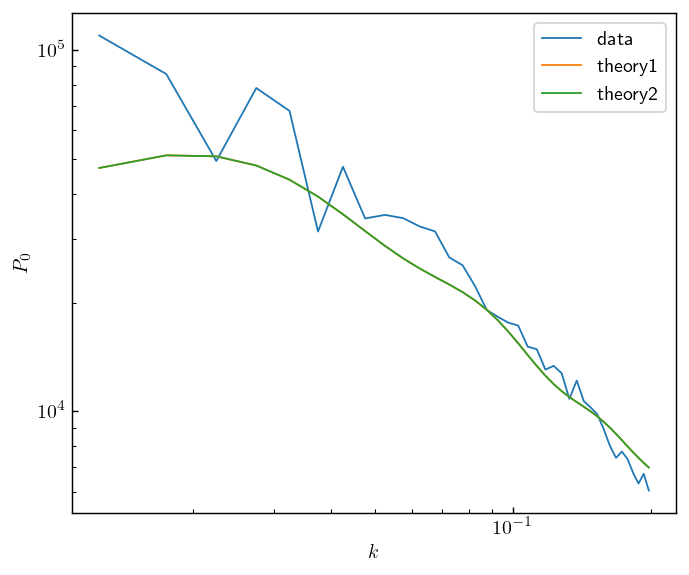

In [28]:
pbjObj_c = model_pbj.likelihood["pbjboss"].pbjobj
colors=['blue', 'green', 'y','m']
z_bins = pbjObj_c.z_bins
kCut = pbjObj_c.kPE[pbjObj_c.IdxP[0]]

%matplotlib inline
plt.figure(figsize=(6,5),dpi=130)

zbin = 3
plt.loglog(kCut, pbjObj_c.CutDataVecs[zbin][0], label='data', linewidth=1.)

# run 1
pointspec={'b1_sgc_z3': 2., 'omega_b': 0.022, 'b1_sgc_z1': 2., 'b1_ngc_z3': 2., 'h': 0.67, 'b1_ngc_z1': 2.7, 'omega_cdm': 0.12,  'logA': 3.044, 
           'omega_scf':0.0 }

logposterior = model_pbj.logposterior(pointspec, as_dict=True)
Pell_class = pbjObj_c.theorydict[zbin]['P0']
plt.loglog(kCut, Pell_class, label='theory1', linewidth=1.)

# run 2
pointspec={'b1_sgc_z3': 2., 'omega_b': 0.022, 'b1_sgc_z1': 2., 'b1_ngc_z3': 2., 'h': 0.67, 'b1_ngc_z1': 2.7, 'omega_cdm': 0.01,  'logA': 3.044, 
           'omega_scf':0.11 }
logposterior = model_pbj.logposterior(pointspec, as_dict=True)
Pell_class = pbjObj_c.theorydict[zbin]['P0']
plt.loglog(kCut, Pell_class, label='theory2', linewidth=1.)

plt.xscale('log')
plt.xlabel(r'$k$'),plt.ylabel(r'$ P_0$')
plt.legend()
plt.show()

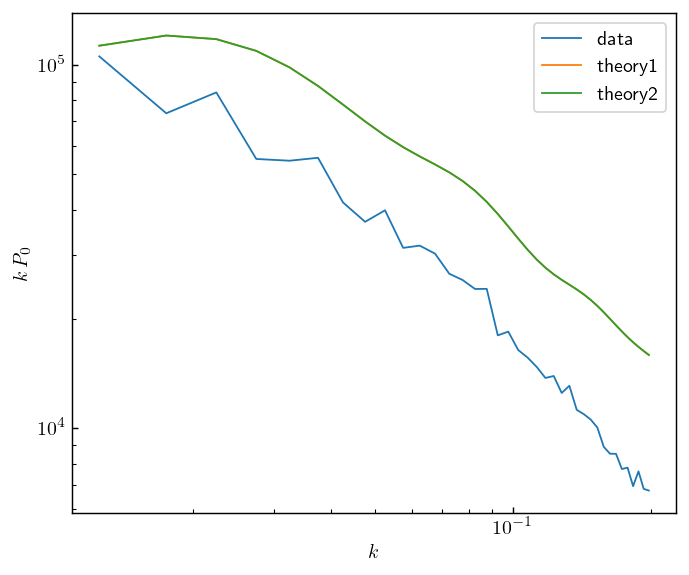

In [24]:
%matplotlib inline
plt.figure(figsize=(6,5),dpi=130)

# for i in range(len(z_bins)):
#     var = np.diag(pbjObj_c.Cov[i][:len(kCut),:len(kCut)])
#     plt.errorbar(kCut, kCut*pbjObj_c.CutDataVecs[i][0], yerr=kCut*np.sqrt(var), label=f'P0 at z={z_bins[i]}', linewidth=1.)

plt.loglog(kCut, pbjObj_c.CutDataVecs[0][0], label='data', linewidth=1.)
plt.loglog(kCut, Pell_class1, label='theory1', linewidth=1.)
plt.loglog(kCut, Pell_class2, label='theory2', linewidth=1.)


plt.xscale('log')
plt.xlabel(r'$k$'),plt.ylabel(r'$k\, P_0$')
plt.legend()
plt.show()

with bacco

In [4]:
info_from_yaml = yaml_load_file("/home/fverdian/cobaya/FRA-params/pbj_boss_b1only.yaml")
info_from_yaml['likelihood']['pbjboss']['python_path']='/home/fverdian/cobaya/pbj4cobaya/'
info_from_yaml['likelihood']['pbjboss']['pbj_path']='/home/fverdian/cobaya/pbj-multiz/'
m_bacco = get_model(info_from_yaml)

pbjObj_b = m_bacco.likelihood["pbjboss"].pbjobj



[model] *WARNING* Ignored blocks/options: ['sampler', 'output']
[info] The linear power spectrum will be computed with bacco
Loading linear emulator...
[absl] Fingerprint not found. Saved model loading will continue.
[absl] Fingerprint not found. Saved model loading will continue.
Linear emulator loaded in memory.
[info] Infrared resummation: True, kind: EH
[info] Alcock-Paczynski distortions: True


/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to bre

[0.38 0.38 0.61 0.61] {'h': 0.676, 'Obh2': 0.022, 'Och2': 0.119}
[pbjboss] Observables: ['P0', 'P2']
[pbjboss] Using model_varied_cosmology_analytic_marg_multiz as likelihood model function
Setting fx functions
[pbjboss] Analyzing boss at redshifts [0.38 0.38 0.61 0.61]
[pbjboss] Analytically marginalizing on ['bG3', 'c0', 'c2', 'aP', 'e0k2', 'e2k2']


--- bacco vs class

In [3]:
h=0.67
params = {
    'ns'            : 0.96,
    'A_s'           : np.exp(3.044)*1.e-10,
    'hubble'        : h,
    'omega_baryon'  : 0.022/h/h,
    'omega_cold'    : (0.144)/h/h, # This is Omega_cb!!!
    'neutrino_mass' : 0.,
    'w0'            : -1.,
    'wa'            : 0.,
    'expfactor'     : 1.
}

kL = np.logspace(-2, np.log10(0.2), 100)

kcut = kL[np.where(kL <= 50)]
kcut, PL_bacco = emulator.get_linear_pk(k=kcut, cold=True, **params)
# PL_class = model_pbj.provider.get_Pk_interpolator(nonlinear=False).P(0.,kcut*h)*h**3


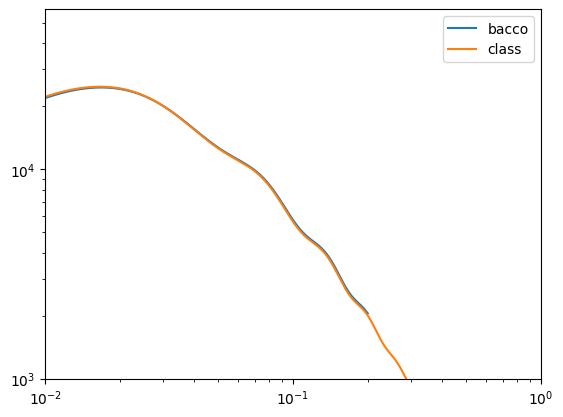

In [13]:
%matplotlib inline
plt.loglog(kcut,PL_bacco, label='bacco')
# plt.loglog(kcut,PL_class, label='cobaya')
# plt.loglog(kL,Pk_cb_class, label='class')
plt.loglog(kk,Pkatk[:,-1]*h**3, label='class')

plt.xlim([1.e-2,1])
plt.ylim([1.e3,None])
plt.legend()
plt.show()

In [21]:
from classy import Class

CDMcosmo = Class()
CDMcosmo.set({'h': 0.67, 'omega_b': 0.022, 'omega_cdm': 0.12, 'A_s': 2.0989031673191437e-09, 'n_s': 0.96, 'tau_reio': 0.0925, 'N_ncdm': 0.0, 'N_ur': 3.046, 'non_linear': 'none', 'input_verbose': 3, 'output': 'lCl tCl mPk pCl', 'P_k_max_1/Mpc': 5, 'z_pk': '0.61 0.38 0', 'k_per_decade_for_pk':1.,'k_per_decade_for_bao':2.})

CDMcosmo.compute()
kL = np.logspace(-2, np.log10(0.2), 100)

Pk_cb_class = [] # P(k) in (Mpc/h)**3
for kk in kL:
    Pk_cb_class.append(CDMcosmo.pk(kk*h, 0.)*h**3 ) # function .pk(k,z)

Pkatk, kk , zz = CDMcosmo.get_pk_and_k_and_z(nonlinear=False, h_units=True)
print(kk.shape)

Reading input parameters
 -> matched budget equations by adjusting Omega_Lambda = 0.683578
(532,)


In [2]:
%%capture
import baccoemu
emulator = baccoemu.Matter_powerspectrum();

2025-01-19 15:45:43.306992: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-19 15:45:43.309171: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-19 15:45:43.663771: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-19 15:45:43.730812: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-19 15:45:49.002271: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co